<a href="https://colab.research.google.com/github/MairaGrijalba/Proyecto-Final-DAta-Science-II-Maira-Grijalba/blob/main/ProyectoFinal%2BGrijalbaMaira_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Us Airline industry Dataset**
Esta base de datos proporciona una descripción general completa de las rutas aéreas nacionales dentro de los Estados Unidos desde trimestre del 2019 al primer trimestre del 2024. Incluye información valiosa para analizar los patrones de viaje de los pasajeros, las tendencias de las tarifas de vuelo y de los vuelos por trimestres de las aerolíneas. Para objeto de este estudio se analizará del año 2021 al 2024 (primer trimestre para el 2024). Dado que la pandemia de COVID-19 altera drásticamente las cifras para el 2019 y 2020 no seria adecuado generar un modelo que sea eficiente para las decisiones a futuro. Además, la pandemia ha acelerado la necesidad de innovación y adaptación en este sector, por lo que el análisis de estos datos puede ser fundamental para ayudar a las aerolíneas a restablecer la confianza de los clientes y redecorar su estrategia comercial.

El análisis de datos se ha convertido en una herramienta esencial para la toma de decisiones informadas en diversas industrias. La base de datos seleccionada, que contiene información relacionada con las aerolíneas de EE. UU., proporciona una rica fuente de datos sobre el rendimiento de las aerolíneas, tarifas y otros factores operativos críticos. Este análisis tiene como motivación principal entender las tendencias y patrones en la industria de la aviación, especialmente en el contexto de la recuperación postpandemia. La accesibilidad y el impacto de este análisis son particularmente relevantes, dado el papel crucial que desempeñan las aerolíneas en la economía y en la conectividad global.

La industria de la aviación enfrenta continuamente desafíos, desde la competencia feroz hasta las fluctuaciones económicas y los cambios en las expectativas de los clientes. Evaluar los datos sobre el rendimiento puede ayudar a las aerolíneas a identificar áreas de mejora, optimizar sus operaciones y, en última instancia, ofrecer un excelente servicio a los pasajeros.

https://www.kaggle.com/datasets/muhammadehsan000/us-airline-industry-dataset-1993-2024?resource=download

In [1]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from scipy import stats
from googleapiclient.discovery import build
from datetime import datetime, timedelta
from wordcloud import WordCloud

sns.set()

In [2]:
url=('https://raw.githubusercontent.com/MairaGrijalba/Grijalba-Preentrega-proyecto-final/main/US%20Airline.csv')
df= pd.read_csv(url)

**Dataset sin normalizar**

In [3]:
df.head(5)

,tbl1apk,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,201911288912391LASISP,2019,1,32211,31703,"Las Vegas, NV","New York City, NY (Metropolitan Area)",12889,12391,LAS,ISP,2282,13,26396,WN,9123.0,26607.0,F9,351.0,18350.0
1,201911289213342LAXMKE,2019,1,32575,33342,"Los Angeles, CA (Metropolitan Area)","Milwaukee, WI",12892,13342,LAX,MKE,1756,315,23506,WN,5736.0,22504.0,WN,5736.0,22504.0
2,201911295315096LGASYR,2019,1,31703,35096,"New York City, NY (Metropolitan Area)","Syracuse, NY",12953,15096,LGA,SYR,222,86,15030,DL,9858.0,15036.0,AA,142.0,14590.0
3,201911323211433MDWDTW,2019,1,30977,31295,"Chicago, IL","Detroit, MI",13232,11433,MDW,DTW,235,302,17336,WN,5272.0,16515.0,WN,5272.0,16515.0
4,201911014010800ABQBUR,2019,1,30140,32575,"Albuquerque, NM","Los Angeles, CA (Metropolitan Area)",10140,10800,ABQ,BUR,677,41,20096,WN,7847.0,19623.0,WN,7847.0,19623.0


**Filtrar datos, eliminando los años 2019 y 2020**

In [4]:
df_fil = df[~df['Year'].isin([2019, 2020, 2024])]

# Mostrar las primeras filas del DataFrame filtrado
print("\nDatos Filtrados:")
print(df_fil.head())


Datos Filtrados:
                     tbl1apk  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

                 city1                               city2  airportid_1  \
15668  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15669  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15670  Albuquerque, NM                         Phoenix, AZ        10140   
15671  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   
15672  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   

       airportid_2 airport_1 airport_2  nsmiles  passeng

In [5]:
df_fil.head(5)

,tbl1apk,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,113,15008,WN,10000.0,15008.0,WN,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,100,16904,AA,9756.0,16833.0,AA,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,258,13636,WN,7257.0,13049.0,WN,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,37,18964,WN,7982.0,17567.0,WN,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,40,20277,AA,4266.0,20665.0,WN,3712.0,18273.0


**Renombrar columna 'tbl1apk' ahora 'routeID'**

In [6]:
df_fil.rename(columns={'tbl1apk': 'routeID'}, inplace=True)

<ipython-input-6-babe92b15688>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fil.rename(columns={'tbl1apk': 'routeID'}, inplace=True)


## **Dataset normalizado**

In [7]:
df.rename(columns={'tbl1apk': 'routeID'}, inplace=True)  # Rename the column
df_fil.head(5)

,routeID,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,113,15008,WN,10000.0,15008.0,WN,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,100,16904,AA,9756.0,16833.0,AA,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,258,13636,WN,7257.0,13049.0,WN,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,37,18964,WN,7982.0,17567.0,WN,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,40,20277,AA,4266.0,20665.0,WN,3712.0,18273.0


**Cambiar variables categoricas**

In [8]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Definir las variables a codificar
categorical_columns = ['city1', 'city2', 'airport_1', 'airport_2', 'carrier_lg', 'carrier_low']

# Aplicar Label Encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Ver las primeras filas después de Label Encoding
print(df_fil.head())

                     routeID  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

                 city1                               city2  airportid_1  \
15668  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15669  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15670  Albuquerque, NM                         Phoenix, AZ        10140   
15671  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   
15672  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   

       airportid_2 airport_1 airport_2  nsmiles  passengers   fare carrier

**Estandarizacion de variables**

In [9]:
pip install pandas scikit-learn


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [11]:
#Separar las variables continuas y categóricas/discretas

continuous_columns = ['fare','fare_lg', 'fare_low'] # Ejemplo de columnas continuas

# Corrected the column name from 'passegers' to 'passengers'
discrete_columns = ['passengers'] # Ejemplo de columnas discretas

#Crear un DataFrame con solo las columnas continuas

X_continuous = df[continuous_columns]

#Aplicar estandarización solo en las columnas continuas

scaler = StandardScaler()

continuous_scaled = scaler.fit_transform(X_continuous)

#Reconstruir el DataFrame original con las columnas estandarizadas y las discretas sin cambios

X_scaled = pd.concat([

pd.DataFrame(continuous_scaled, columns=continuous_columns),

# Now using the corrected column name
df[discrete_columns].reset_index(drop=True)

], axis=1)

In [12]:
print(df_fil.head())

                     routeID  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

                 city1                               city2  airportid_1  \
15668  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15669  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15670  Albuquerque, NM                         Phoenix, AZ        10140   
15671  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   
15672  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   

       airportid_2 airport_1 airport_2  nsmiles  passengers   fare carrier

**Outliers** Calcular Q1 y Q3

In [14]:
# Outliers 'fare'

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_fil['fare'].quantile(0.25)
Q3 = df_fil['fare'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Calcular los límites superior e inferior
lower_bound = Q1 - 2000 * IQR
upper_bound = Q3 + 40000* IQR

# Filtrar los outliers
# Changed: Enclose 'fare' in quotes to refer to the column name
df_filt = df_fil[(df_fil['fare'] >= lower_bound) & (df_fil['fare'] <= upper_bound)]

# Ver el DataFrame limpio
print(df_filt.head(5))

                     routeID  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

                 city1                               city2  airportid_1  \
15668  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15669  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15670  Albuquerque, NM                         Phoenix, AZ        10140   
15671  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   
15672  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   

       airportid_2 airport_1 airport_2  nsmiles  passengers   fare carrier

In [15]:
df_filt.head(5)

,routeID,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,113,15008,WN,10000.0,15008.0,WN,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,100,16904,AA,9756.0,16833.0,AA,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,258,13636,WN,7257.0,13049.0,WN,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,37,18964,WN,7982.0,17567.0,WN,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,40,20277,AA,4266.0,20665.0,WN,3712.0,18273.0


In [16]:
# Outliers 'fare_lg'

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_filt['fare_lg'].quantile(0.25)  # Changed fare_lg to 'fare_lg'
Q3 = df_filt['fare_lg'].quantile(0.75)  # Changed fare_lg to 'fare_lg'

# Calcular el IQR
IQR = Q3 - Q1

# Calcular los límites superior e inferior
lower_bound = Q1 - 4000 * IQR
upper_bound = Q3 + 20000* IQR

# Filtrar los outliers
df_filte = df_filt[(df_filt['fare_lg'] >= lower_bound) & (df_filt['fare_lg'] <= upper_bound)]

In [17]:
print(df_filte.shape)

(23324, 20)


In [18]:
# Outliers 'fare_low'

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = df_filte['fare_low'].quantile(0.25)  # Changed fare_lg to 'fare_lg'
Q3 = df_filte['fare_low'].quantile(0.75)  # Changed fare_lg to 'fare_lg'

# Calcular el IQR
IQR = Q3 - Q1

# Calcular los límites superior e inferior
lower_bound = Q1 - 2000 * IQR
upper_bound = Q3 + 6000* IQR

# Filtrar los outliers
df_filtered = df_filte[(df_filte['fare_low'] >= lower_bound) & (df_filte['fare_low'] <= upper_bound)]

In [19]:
df_filtered.head(5)

,routeID,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,113,15008,WN,10000.0,15008.0,WN,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,100,16904,AA,9756.0,16833.0,AA,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,258,13636,WN,7257.0,13049.0,WN,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,37,18964,WN,7982.0,17567.0,WN,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,40,20277,AA,4266.0,20665.0,WN,3712.0,18273.0


**Exploracion dataset**

In [20]:
print(df_filtered.shape)

(23324, 20)


In [21]:
df_filtered.info()
df_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 23324 entries, 15668 to 39022
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   routeID         23324 non-null  object 
 1   Year            23324 non-null  int64  
 2   quarter         23324 non-null  int64  
 3   citymarketid_1  23324 non-null  int64  
 4   citymarketid_2  23324 non-null  int64  
 5   city1           23324 non-null  object 
 6   city2           23324 non-null  object 
 7   airportid_1     23324 non-null  int64  
 8   airportid_2     23324 non-null  int64  
 9   airport_1       23324 non-null  object 
 10  airport_2       23324 non-null  object 
 11  nsmiles         23324 non-null  int64  
 12  passengers      23324 non-null  int64  
 13  fare            23324 non-null  int64  
 14  carrier_lg      23324 non-null  object 
 15  large_ms        23324 non-null  float64
 16  fare_lg         23324 non-null  float64
 17  carrier_low     23324 non-null  

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000
mean,2022.000472,2.515778,31541.201595,32183.117819,12404.444606,13208.374078,1192.896844,356.492711,23539.064912,7064.307366,23482.307066,5179.825630,20024.165881
std,0.815770,1.112217,1104.722775,1255.672229,1415.784621,1422.500413,685.926232,571.782627,8155.971316,2185.792914,8769.196819,3402.037472,7857.845173
min,2021.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,148.000000,0.000000,5800.000000,1429.000000,5800.000000,100.000000,5040.000000
25%,2021.000000,2.000000,30721.000000,30977.000000,11109.000000,12197.000000,647.000000,35.000000,17915.750000,5167.000000,17598.500000,2022.000000,14499.000000
50%,2022.000000,3.000000,31295.000000,32337.000000,12266.000000,13303.000000,1025.000000,144.000000,22301.000000,6970.000000,22121.500000,4681.000000,19206.000000
75%,2023.000000,4.000000,32467.000000,33195.000000,13342.000000,14570.000000,1680.000000,418.000000,27972.250000,9313.250000,28138.250000,8939.500000,24185.500000
max,2023.000000,4.000000,35412.000000,35412.000000,15919.000000,15919.000000,2724.000000,6554.000000,166400.000000,10000.000000,166400.000000,10000.000000,166400.000000


**Borrar duplicados**

In [22]:
print(df_filtered.shape)
train=df_filtered.drop_duplicates()
print(df_filtered.shape)

(23324, 20)
(23324, 20)


**Correlación**

Se realizo una clasificación de las variables numéricas para revisar su correlación.
Acorde con los resultados la correlación entre variables es baja.


In [23]:
# Select only the numerical columns before calculating correlations.
numerical_df = df_filtered.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                    Year   quarter  citymarketid_1  citymarketid_2  \
Year            1.000000 -0.009483       -0.000131       -0.006507   
quarter        -0.009483  1.000000       -0.002614        0.000909   
citymarketid_1 -0.000131 -0.002614        1.000000        0.018130   
citymarketid_2 -0.006507  0.000909        0.018130        1.000000   
airportid_1     0.001166 -0.000629        0.539134        0.043262   
airportid_2    -0.011265 -0.003305        0.059367        0.563710   
nsmiles        -0.015690 -0.010253        0.087208        0.079673   
passengers      0.097873  0.061448       -0.057356       -0.095837   
fare            0.218031  0.089757        0.037277        0.044306   
large_ms       -0.004050 -0.002965       -0.104912       -0.049493   
fare_lg         0.208799  0.082884        0.023528        0.038827   
lf_ms           0.008174  0.000020       -0.073059       -0.001175   
fare_low        0.144281  0.064069        0.008948        0.024755   

                air

<Axes: >

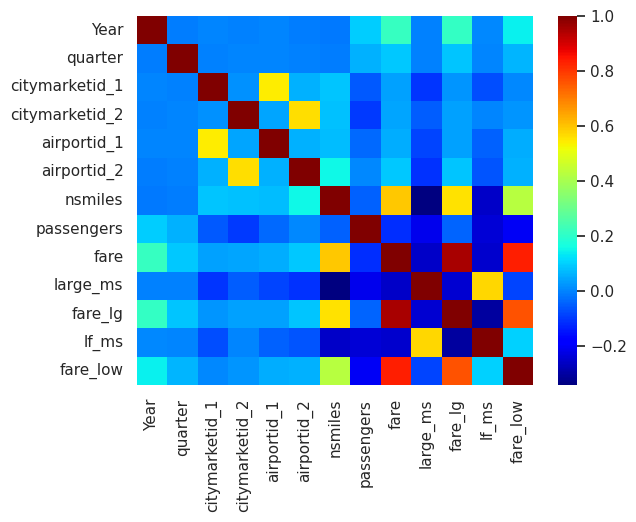

In [24]:
 import seaborn as sns
sns.heatmap(numerical_df.corr(), cmap='jet')

**Correlación pasajeros y tarifas**
Se puede ver como esta correlacionado inversamente proporcional entre menor es la tarifa mayor es el numero de pasajeros.

 **¿Qué tipo de correlación existe entre la tarifa y el numero de pasajeros?**

En el grafico sepuede observa como el numero de pasajeros esta relacionado inversamente con la tarifa; esto significa que cuando la tarifa es menor hay mayor numero de pasajeros, sin embargo, se encuentran muchos pasajeros dispuestos a tomar los vuelos a tarifas altas,esto posiblemente ocurre porque hay pasajeros frecuentes que no pueden evitar viajar independiente de la fluctuación de las tarifas.


(0.0, 7000.0)

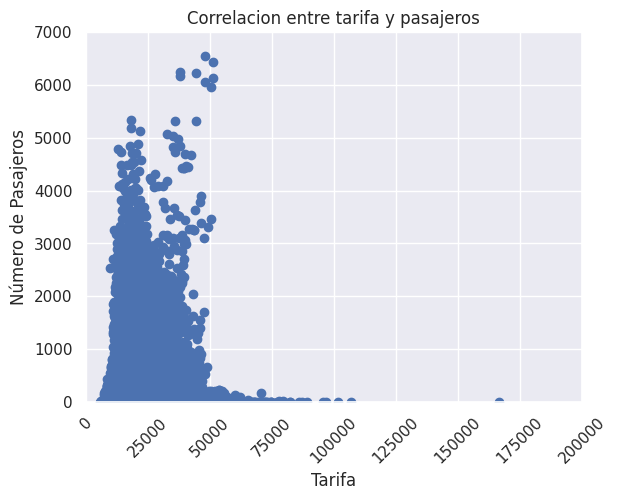

In [25]:
plt.scatter( df_filtered['fare'], df_filtered['passengers'])
plt.xticks(rotation=45)
plt.title('Correlacion entre tarifa y pasajeros')
plt.xlabel('Tarifa')
plt.ylabel('Número de Pasajeros')
plt.xlim(0, 200000)
plt.ylim(0, 7000)

**¿Cómo varia la tarifa a lo largo de los 4 trimestres para los años 2021 a 2023?**
Para el año 2021 las tarifas son notablemente inferiores con respecto a los años 2022 y 2023. Por otro lado todos los primero trimestres las tarifas empiezan inferiores a los demás trimestres y el segundo trimestre tiene las tarifas mas altas para los años 2022 y 2023, en general a lo largo de cada trimestres las tarifas no son lineales y el año que mas fluctuaron las tarifas fue el 2022 y termino con tarifas mas

In [26]:
df2=df_filtered[['quarter', 'Year','fare']].groupby(by=['quarter','Year']).mean().reset_index()
# Map quarter number to end of quarter month
quarter_to_month = {1: '31/03', 2: '30/06', 3: '30/09', 4: '31/12'}
# Convert quarter to a datetime-like string
df2['quarter_str'] = df2['quarter'].map(quarter_to_month) + '/' + df2['Year'].astype(str)
# Convert the new column to datetime
df2['quarter_date'] = pd.to_datetime(df2['quarter_str'], format="%d/%m/%Y")
df2.head()

,quarter,Year,fare,quarter_str,quarter_date
0,1,2021,18449.420417,31/03/2021,2021-03-31
1,1,2022,21720.162500,31/03/2022,2022-03-31
2,1,2023,24862.098019,31/03/2023,2023-03-31
3,2,2021,20816.637209,30/06/2021,2021-06-30
4,2,2022,26800.834947,30/06/2022,2022-06-30


Text(0.5, 1.0, 'Comparacion de tarifas en trimestres')

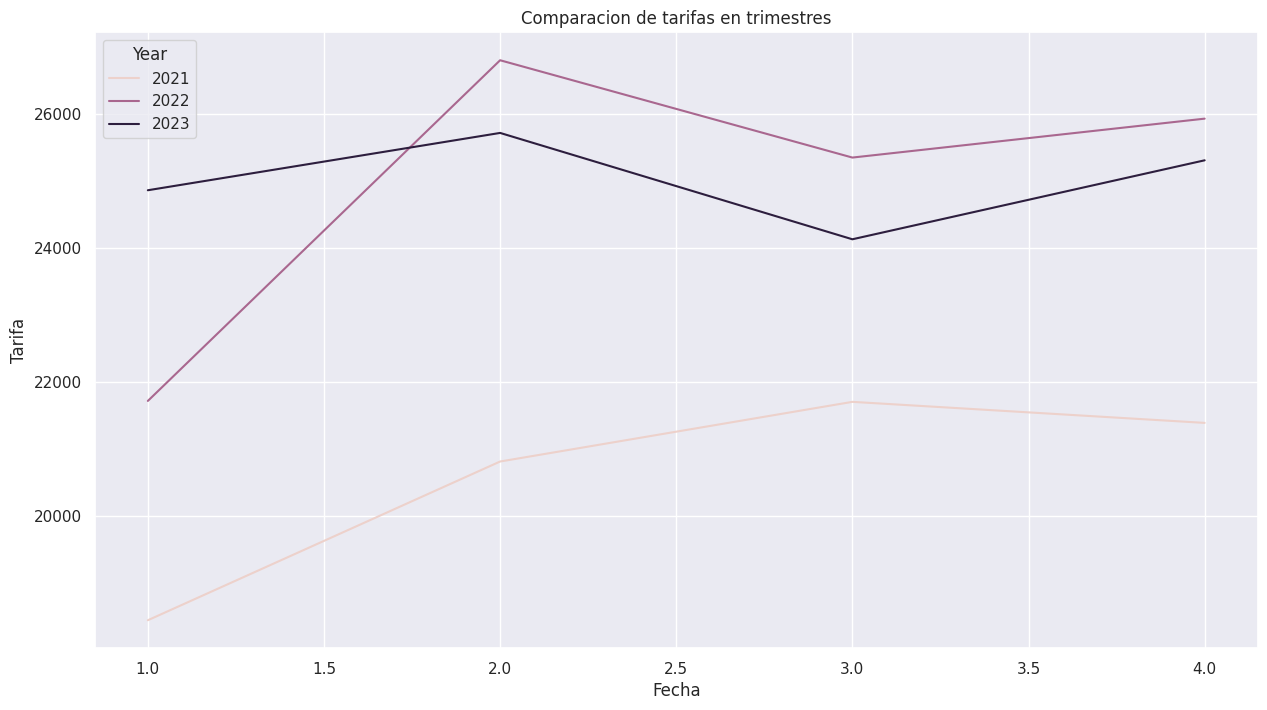

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(x= df2.quarter, y= df2.fare, hue=df2.Year)
plt.xlabel('Fecha')
plt.ylabel('Tarifa')
plt.title('Comparacion de tarifas en trimestres')

In [28]:
df5=df_filtered[['fare_low', 'fare', 'fare_lg']].groupby(by=['fare_low','fare']).mean().reset_index()

df5.head()

,fare_low,fare,fare_lg
0,5040.0,26741,26143.0
1,5200.0,23515,23126.0
2,5750.0,23350,33067.0
3,5800.0,5800,5800.0
4,5816.0,18678,19331.0


**¿Haydiferenciaentre los promedios de tarifas?**
▪
Se puede observar que la diferencia entre el promedio de tarifas bajas es muy pequeña con respecto al promedio de tarifas y las tarifas promedio con carga. También que la diferencia entre el promedio de tarifas y las tarifas altas es casi imperceptible solo se nota por pequeñas diferencias en la parte superior del grafico para las tarifas altas (fare_lg).





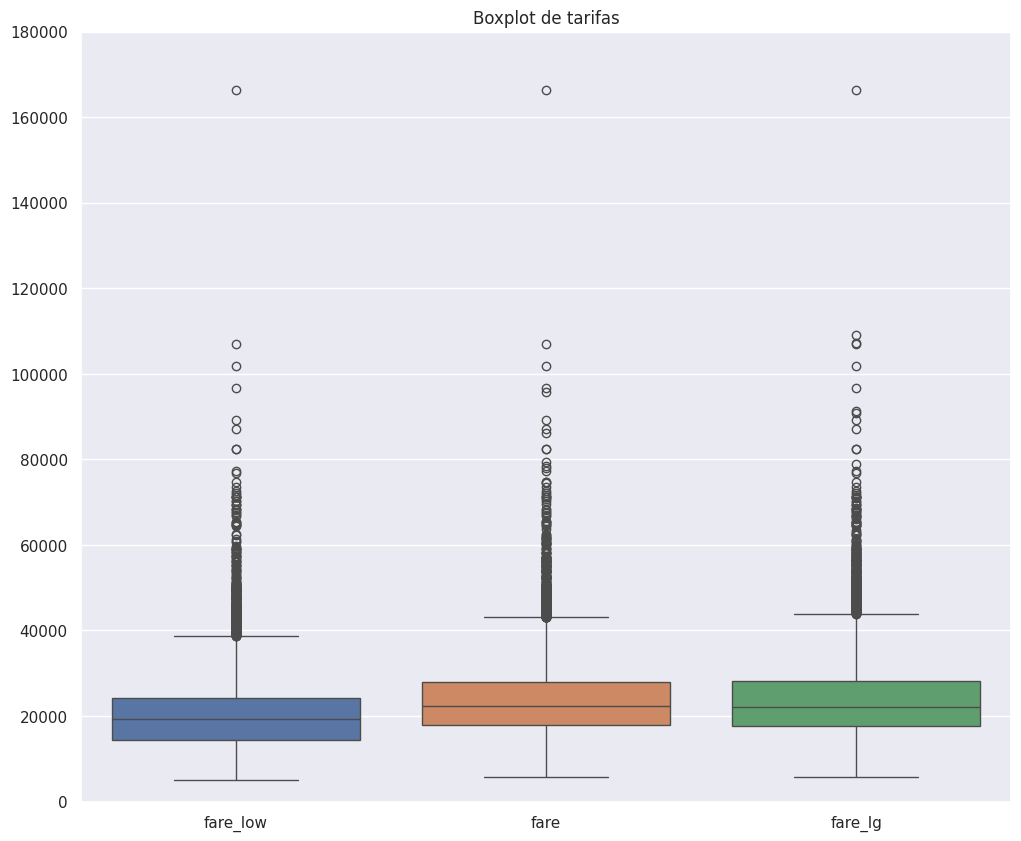

In [29]:
import seaborn as sns

# Con atipicos
plt.figure(figsize=(12,10))
sns.boxplot(data=df5)
plt.ylim(0, 180000)
plt.title('Boxplot de tarifas')
plt.show()

Text(0, 0.5, 'Frecuencia')

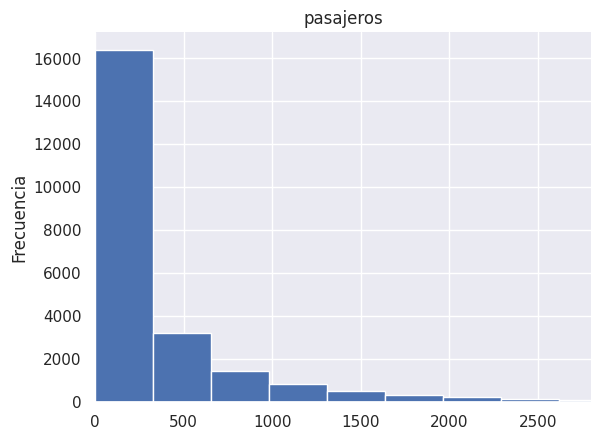

In [30]:
from matplotlib import pyplot as plt
df_filtered['passengers'].plot(kind='hist', bins=20, title='pasajeros')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlim(0, 2800)
plt.ylabel('Frecuencia')


In [31]:
temp=df.groupby(["quarter","carrier_lg"])["fare"].mean().reset_index()

(0.0, 30000.0)

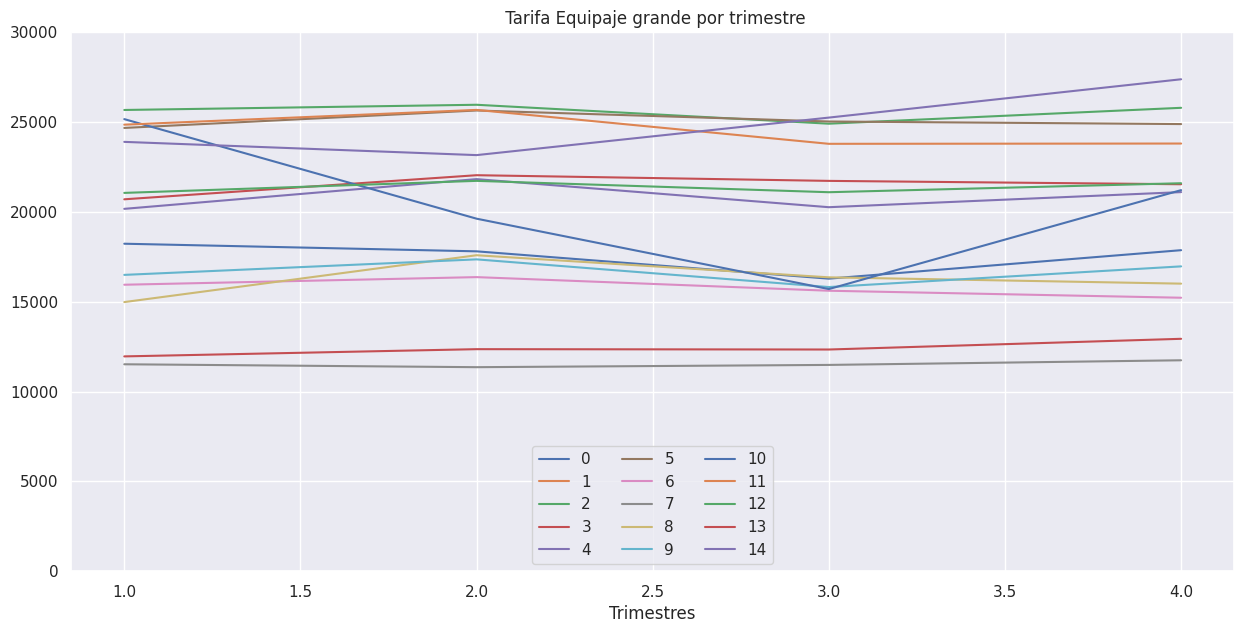

In [32]:
temp.pivot(index="quarter", columns="carrier_lg", values="fare").plot(title= " Tarifa Equipaje grande por trimestre", figsize=(15,7))
plt.xlabel("Trimestres"); plt.legend(loc='lower center', ncol=3); plt.ylim(0, 30000)

In [33]:
temp=df.groupby(["quarter","carrier_low"])["fare"].mean().reset_index()

(0.0, 30000.0)

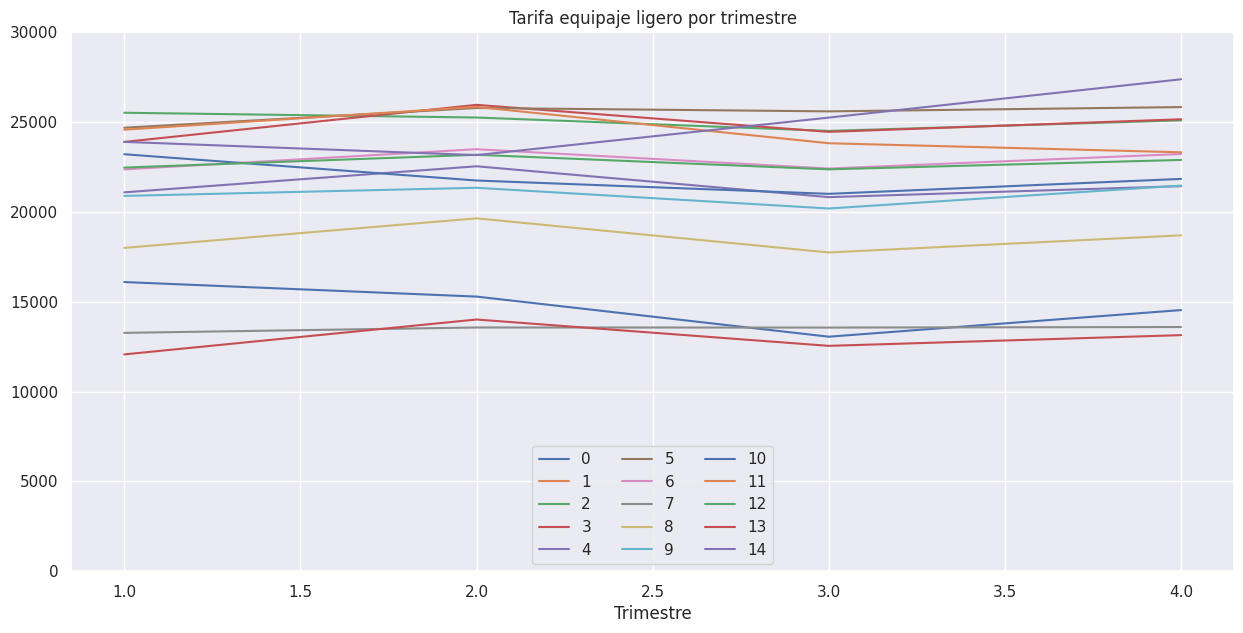

In [34]:
temp.pivot(index="quarter", columns="carrier_low", values="fare").plot(title= "Tarifa equipaje ligero por trimestre", figsize=(15,7))
plt.xlabel("Trimestre"); plt.legend(loc='lower center', ncol=3); plt.ylim(0, 30000)

**Qué ciudades tienen el mayor numero de vuelos?**


Se observa que Los Angelespor mas de 400 vuelos es la ciudad con mayor numero de vuelos seguida porBoston y en un tercer lugar esta New York con menos de 2000 vuelos, Por ultimo, la diferencia entre las ciudades con masvuelosestan grande que la gran mayoría de ciudades tienen menos de 500.

<ipython-input-35-3497372252b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vuelos_por_ciudad.index, y=vuelos_por_ciudad.values, palette='viridis')


Text(0.5, 1.0, 'Cantidad de Vuelos por Ciudad')

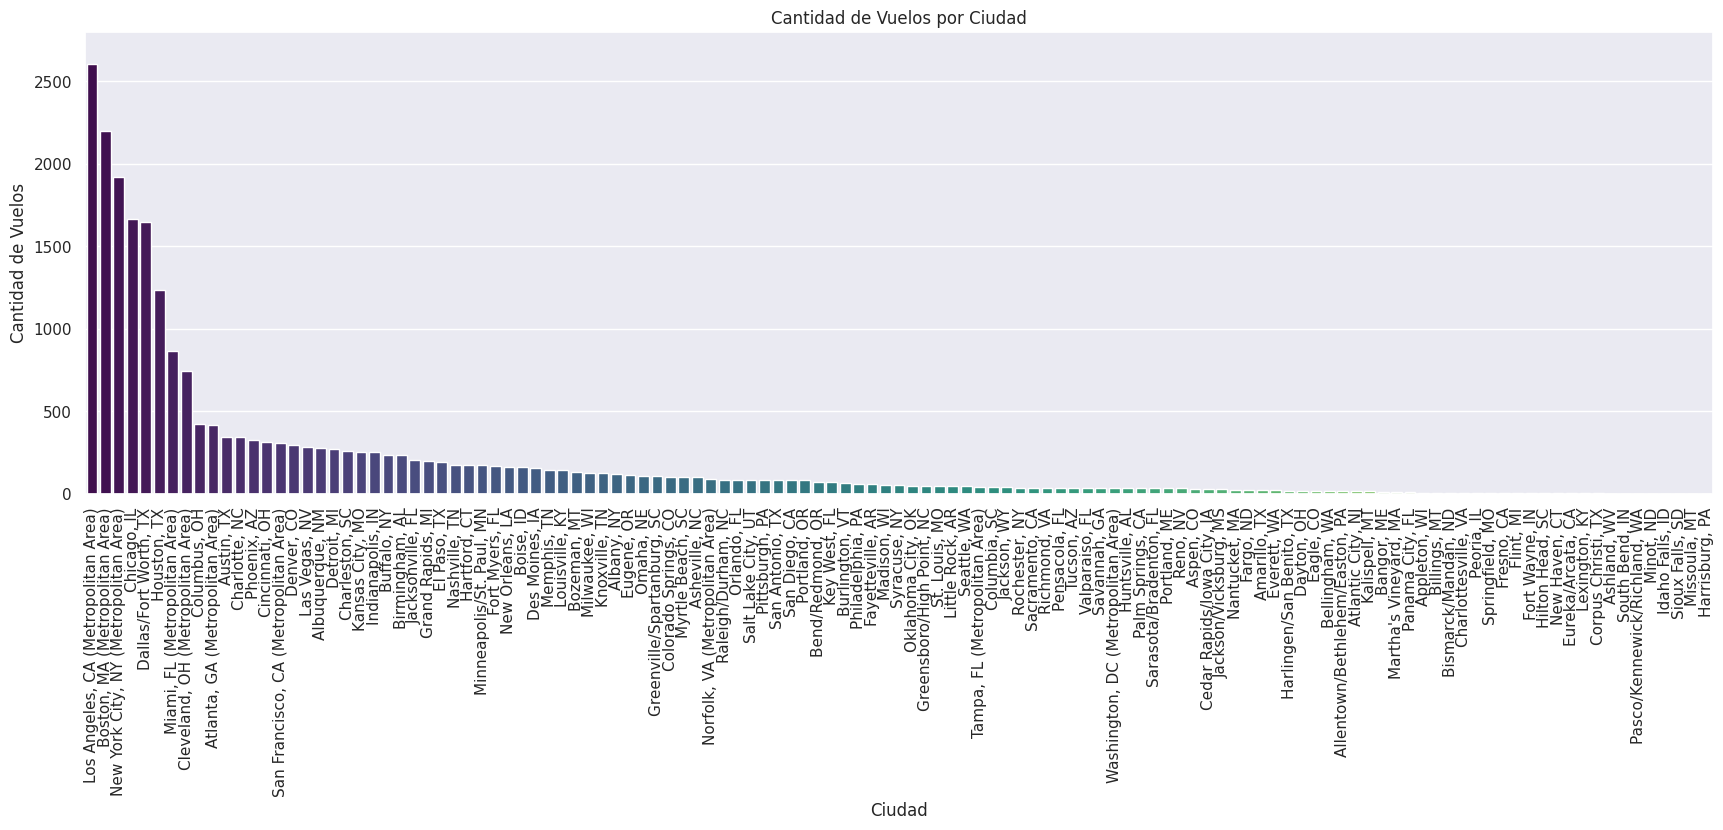

In [35]:
vuelos_por_ciudad = df_filtered['city1'].value_counts()
plt.figure(figsize=(21, 6))
sns.barplot(x=vuelos_por_ciudad.index, y=vuelos_por_ciudad.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0, 2800)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Vuelos')
plt.title('Cantidad de Vuelos por Ciudad')

** texto en cursiva¿Cuáles son las ciudades de donde salen mas pasajeros?**


Los Angelestambién esta en primer lugar como la ciudad que mas salen pasajeros, sin embargo, para el segundo lugar muy cerca similar a Los Angelesesta Chicago, en un tercer y cuarto lugar con un numero de pasajeros muy similar encontramos a Dallas y New York, las siguientes ciudades disminuye bastante el numero de pasajeros y la gran mayoría tener por debajo de doscientos

(0.0, 990000.0)

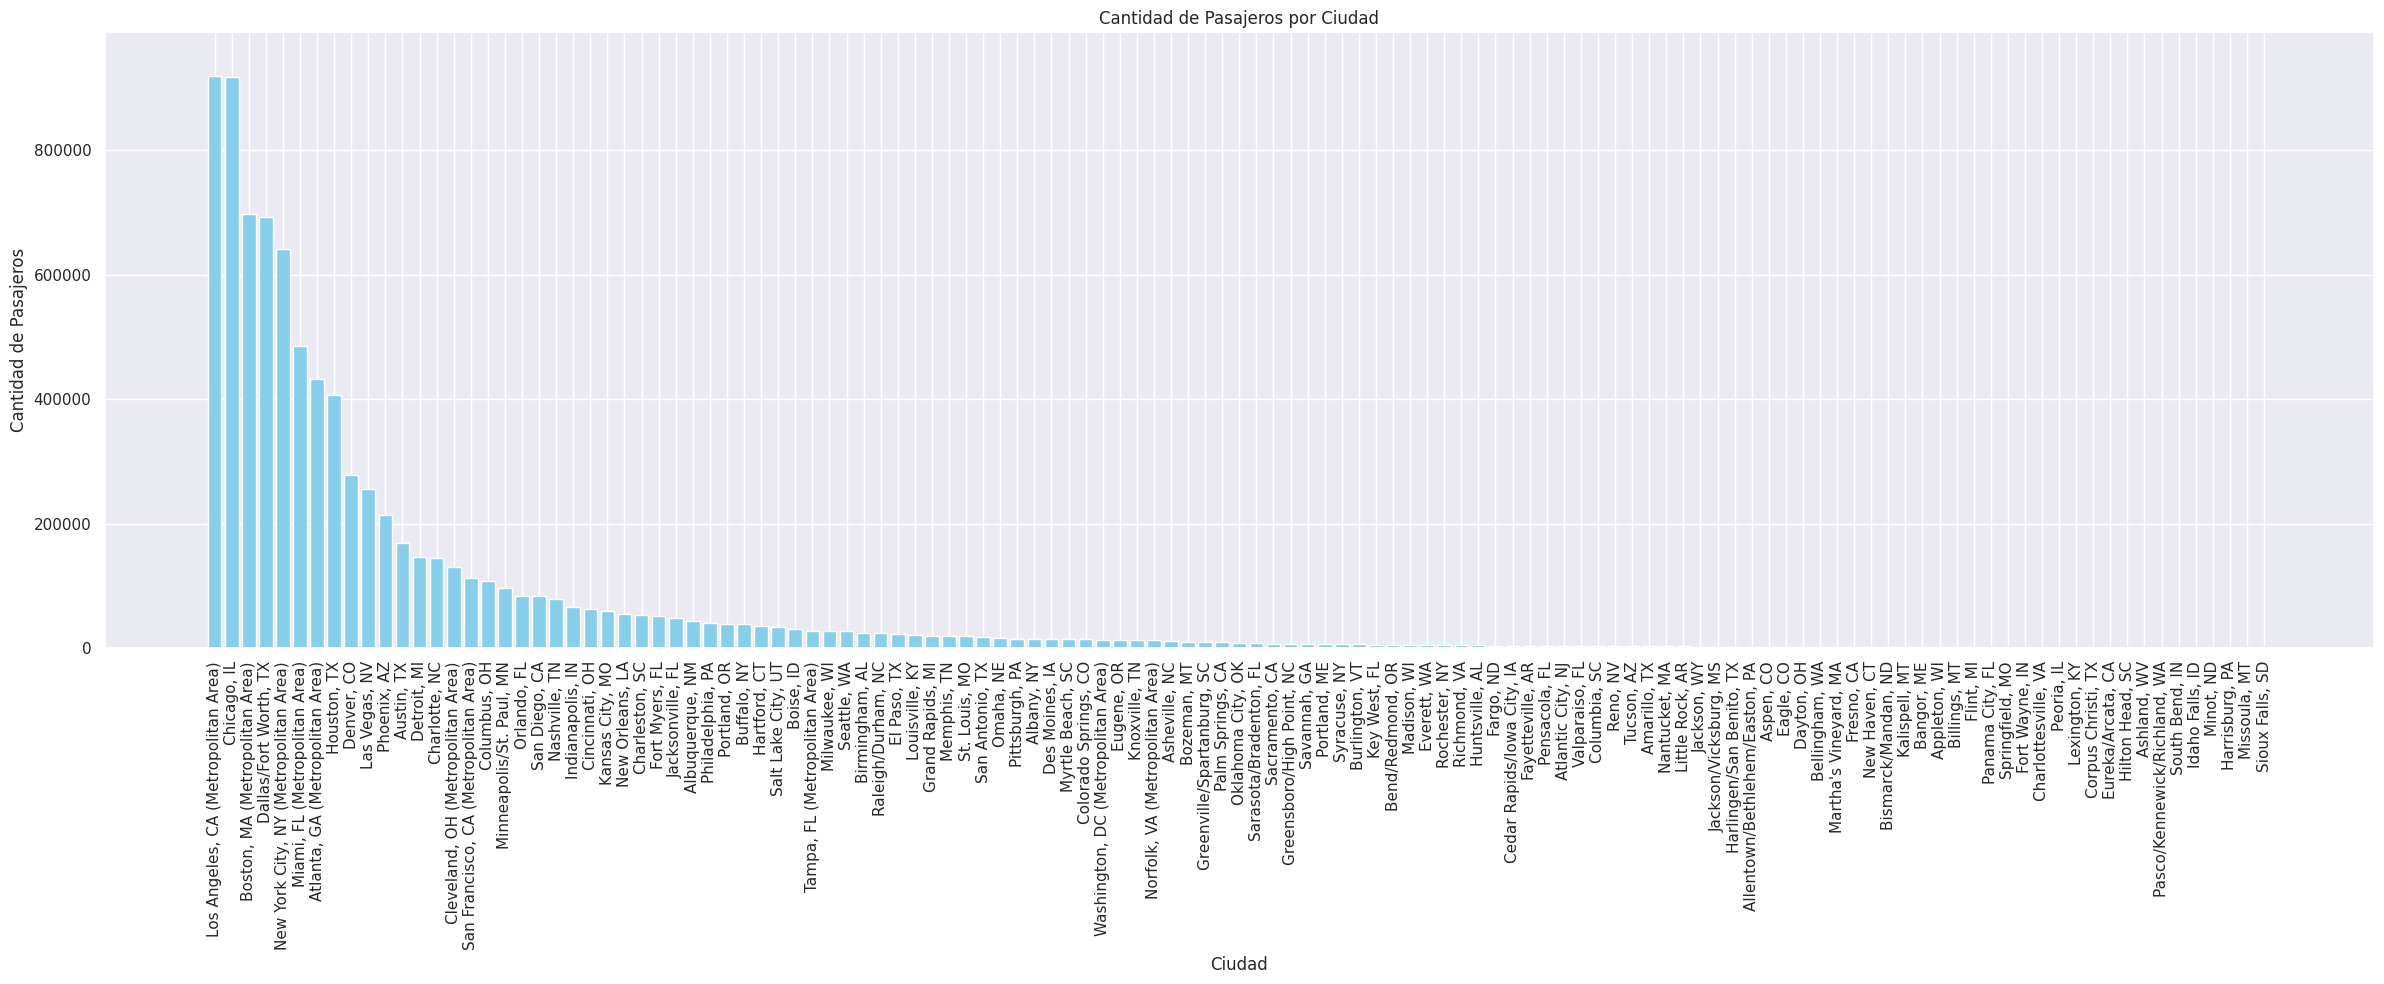

In [36]:
passengers_by_city = df_filtered.groupby('city1')['passengers'].sum().reset_index()
passengers_by_city = passengers_by_city.sort_values(by='passengers', ascending=False)
plt.figure(figsize=(24, 10))
plt.bar(passengers_by_city['city1'], passengers_by_city['passengers'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Cantidad de Pasajeros por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Pasajeros')
plt.tight_layout()      # Ajustar el gráfico para que no se superpongan los elementos
plt.ylim(0, 990000)


**¿Cuál es la ciudad con mayor tarifa promedio y cual con la menor tarifa promedio?**


La ciudad a la que en promedio es mas económico viajar es New Haven y la ciudad a la que es mas costoso viajar con una gran diferencia sobre las demás es Detroit, seguida de Aspen y Jackson y la gran mayoría de ciudades esta en un promedio por debajo de treinta mil y por encima

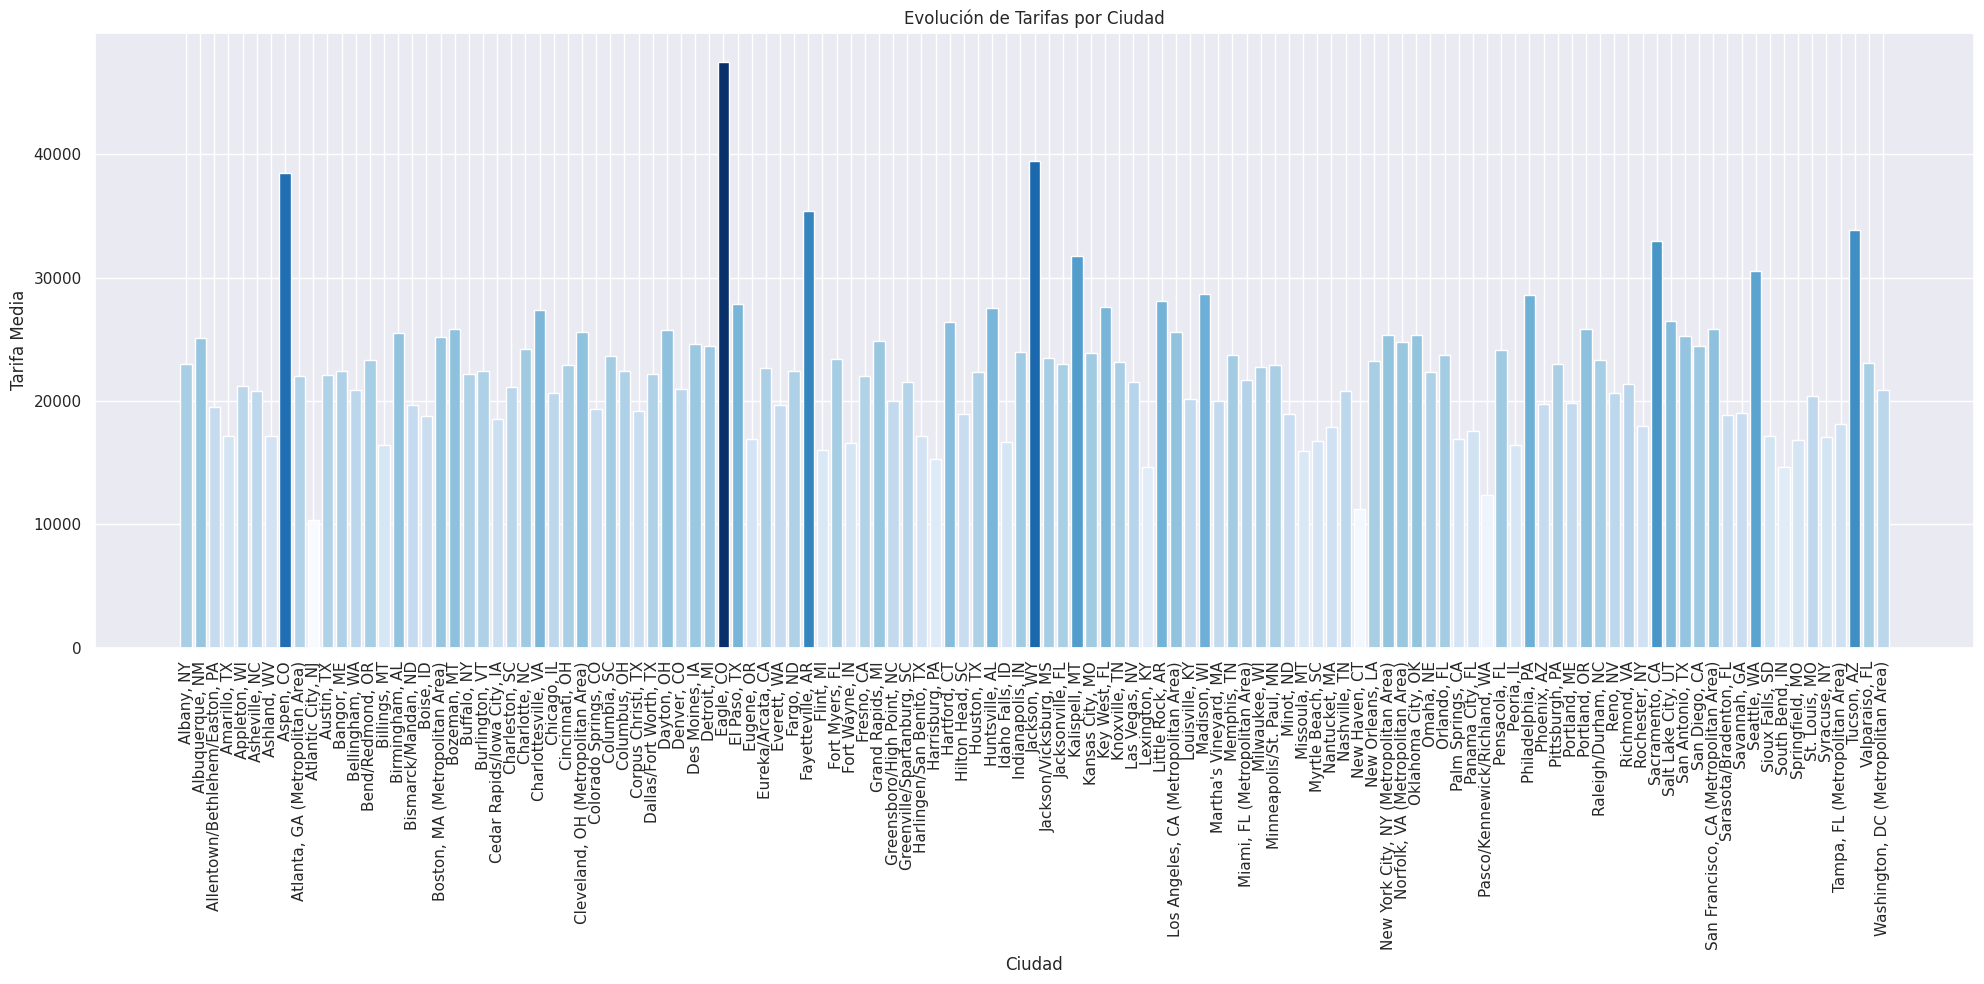

In [37]:
df_grouped = df_filtered.groupby('city1')['fare'].mean().reset_index()
norm = plt.Normalize(df_grouped['fare'].min(), df_grouped['fare'].max())
colors = plt.cm.Blues(norm(df_grouped['fare']))

plt.figure(figsize=(20,10))
plt.bar(df_grouped['city1'], df_grouped['fare'], color=colors)
plt.xlabel('Ciudad')
plt.ylabel('Tarifa Media')
plt.title('Evolución de Tarifas por Ciudad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
df_filtered1 = df[~df['Year'].isin([2019, 2020])]

# Mostrar las primeras filas del DataFrame filtrado
print("\nDatos Filtrados:")
print(df_filtered1.head())


Datos Filtrados:
                     routeID  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

       city1  city2  airportid_1  airportid_2  airport_1  airport_2  nsmiles  \
15668      1     10        10140        11259          1         15      580   
15669      1     10        10140        11298          1         19      580   
15670      1     66        10140        14107          1         88      328   
15671      1    106        10140        10821          1          6     1670   
15672      1    106        10140        11278          1         17     1670   

       passengers   fare  

In [39]:
print(df_filtered1.shape)

(25260, 20)


In [40]:
df_filtered2 = df_filtered1[~df['quarter'].isin([2, 3, 4])]

# Mostrar las primeras filas del DataFrame filtrado
print("\nDatos Filtrados:")
print(df_filtered2.head())


Datos Filtrados:
                     routeID  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

       city1  city2  airportid_1  airportid_2  airport_1  airport_2  nsmiles  \
15668      1     10        10140        11259          1         15      580   
15669      1     10        10140        11298          1         19      580   
15670      1     66        10140        14107          1         88      328   
15671      1    106        10140        10821          1          6     1670   
15672      1    106        10140        11278          1         17     1670   

       passengers   fare  

<ipython-input-40-dfa32d4d4499>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered2 = df_filtered1[~df['quarter'].isin([2, 3, 4])]


In [41]:
df_filtered2.head(5)

,routeID,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,1,10,10140,11259,1,15,580,113,15008,12,10000.0,15008.0,12,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,1,10,10140,11298,1,19,580,100,16904,2,9756.0,16833.0,2,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,1,66,10140,14107,1,88,328,258,13636,12,7257.0,13049.0,12,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,1,106,10140,10821,1,6,1670,37,18964,12,7982.0,17567.0,12,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,1,106,10140,11278,1,17,1670,40,20277,2,4266.0,20665.0,12,3712.0,18273.0


In [42]:
print(df_filtered2.shape)

(7570, 20)


In [43]:
pasajeros_por_año = df_filtered2.groupby('Year')['passengers'].sum().reset_index()



**¿Cómo ha sido la evolución del primer trimestre de cada año en cuanto al numero de pasajeros 2021-2024?**
Se observar que la mayor diferencia esta entre el primer trimestre del año 2021 y el primer trimestre del año 2022, la cual es casi dos veces mayor, esto puede atribuirse a la pandemia que genero restricciones y temor, seguido de esto vemos como del año 2022 al 2023 hubo un incremento de mas de cien mil pasajeros, y para finalizar aunque sigue creciendo el numero de pasajeros la diferencia es unpocomas de diez mil pasajeros adicionales para el primer trimestre del 2024, se puede concluir que ha sido una demanda creciente en los últimos 4 años, sin embargo, se ha venido disminuyendo el margen de crecimiento del numero de pasajeros.*texto en cursiva*

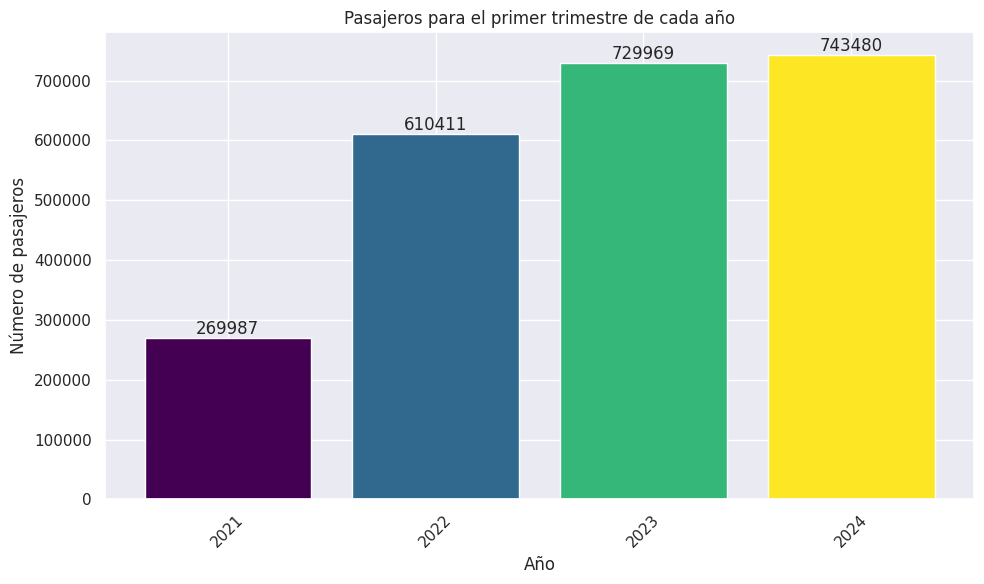

In [44]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(pasajeros_por_año)))  # Genera una lista de colores

bars = plt.bar(pasajeros_por_año['Year'].astype(str),pasajeros_por_año['passengers'], color=colors)
plt.xlabel('Año')
plt.ylabel('Número de pasajeros')
plt.title('Pasajeros para el primer trimestre de cada año')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Agregar el número de pasajeros encima de cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom')  # Plasmar el número encima de la barra

plt.tight_layout()  # Ajustar diseño
plt.show()

**Cómo ha sido la evolución del promedio de la tarifa para el primer trimestre de los años 2021 al 2024?**
▪
La tarifa venido en aumento desde el año 2021, el mayor incremento en el promedio de tarifa fue del año 2021 al 2022 luego se ha disminuido la brecha entre cada incremento tanto que la diferencia entre el primer trimestre del 2024 solo incremento menos de mil en comparación con el primer trimestre del 2023.

In [45]:
tarifa_por_año = df_filtered2.groupby('Year')['fare'].mean().reset_index()

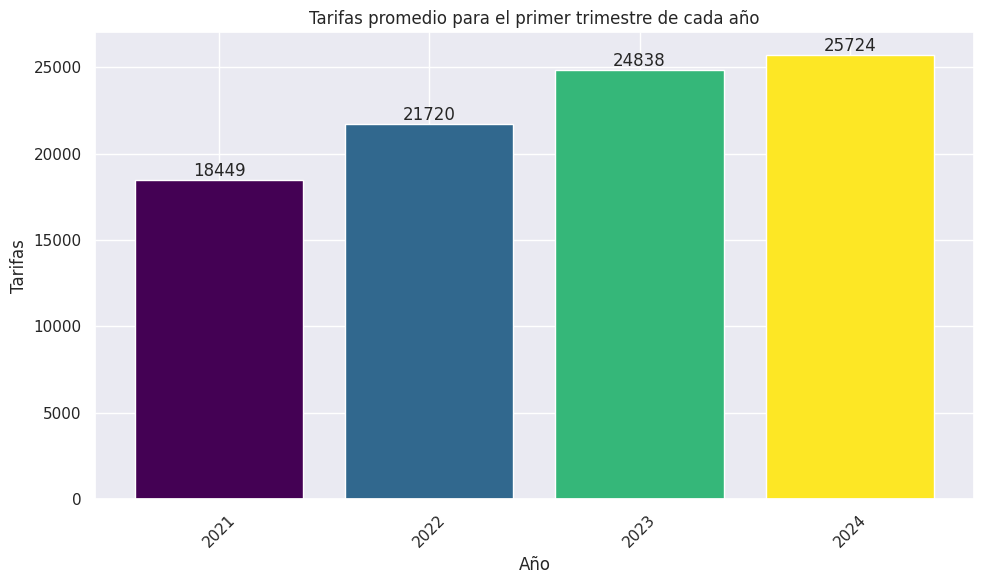

In [46]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(tarifa_por_año)))  # Genera una lista de colores

bars = plt.bar(tarifa_por_año['Year'].astype(str),tarifa_por_año['fare'], color=colors)
plt.xlabel('Año')
plt.ylabel('Tarifas')
plt.title('Tarifas promedio para el primer trimestre de cada año')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Agregar el número de pasajeros encima de cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom')  # Plasmar el número encima de la barra

plt.tight_layout()  # Ajustar diseño
plt.show()

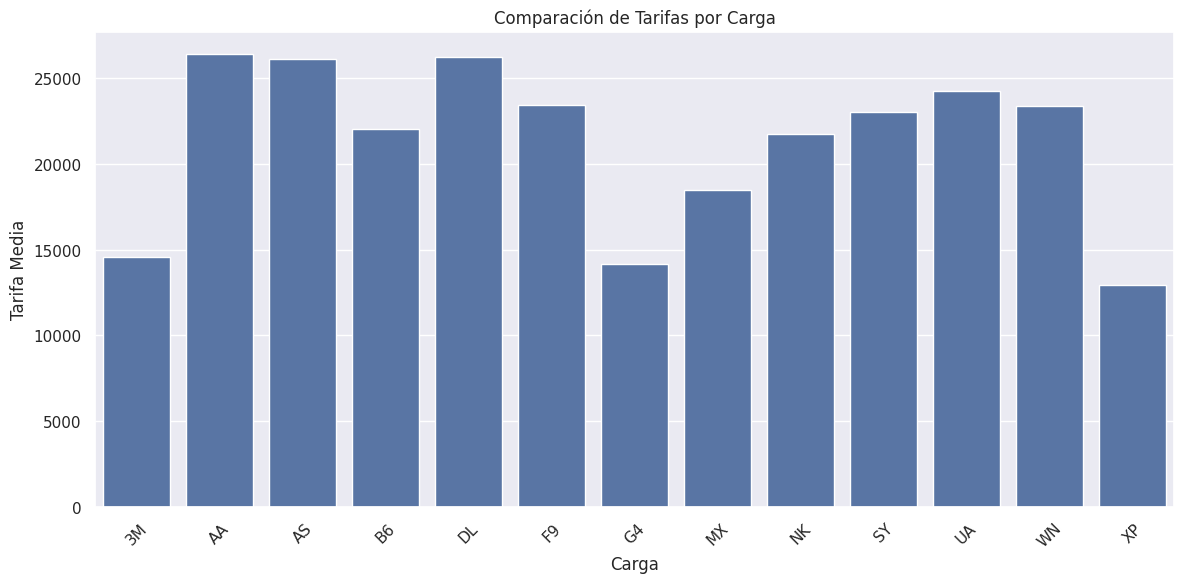

In [47]:
df_grouped1= df_filtered.groupby('carrier_low')['fare'].mean().reset_index()

# Crear un gráfico de comparación
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped1, x='carrier_low', y='fare')
plt.title('Comparación de Tarifas por Carga')
plt.xlabel('Carga')
plt.ylabel('Tarifa') # Added missing ylabel
plt.ylabel('Tarifa Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

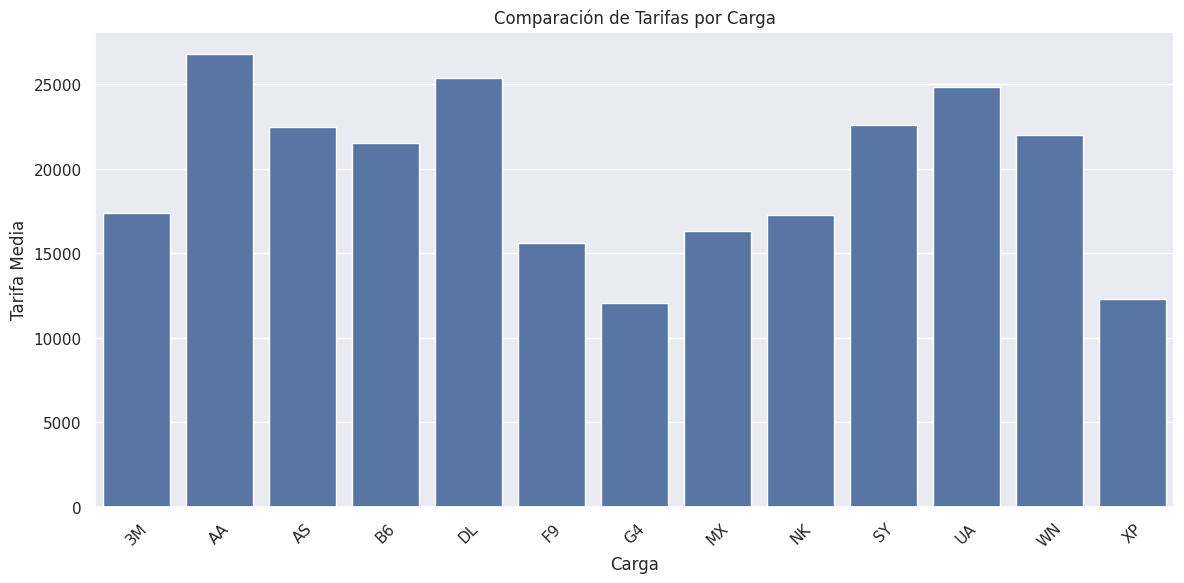

In [48]:
df_grouped = df_filtered.groupby('carrier_lg')['fare'].mean().reset_index()

# Crear un gráfico de comparación
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='carrier_lg', y='fare')
plt.title('Comparación de Tarifas por Carga')
plt.xlabel('Carga')
plt.ylabel('Tarifa Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Cantidad de vuelos')

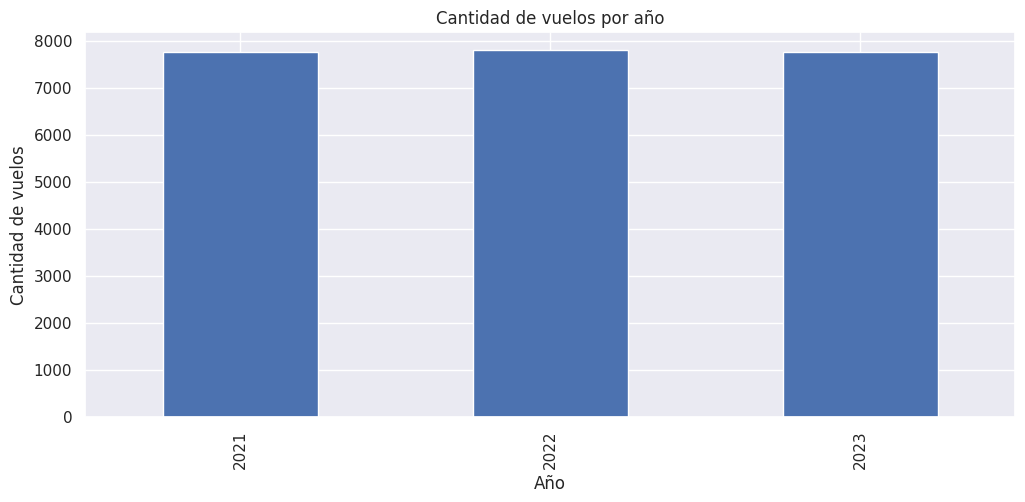

In [49]:
plt.figure(figsize = (12,5))
df_filtered.groupby("Year").size().plot(kind="bar"); plt.title("Cantidad de vuelos por año")
plt.xlabel("Año"); plt.ylabel("Cantidad de vuelos")

In [50]:
!pip install xgboost

In [51]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split

In [52]:
df_filtered['passengers'].unique()

array([ 113,  100,  258, ..., 1197, 1122, 1887])

In [53]:
df_filtered.loc[df_filtered['fare'] <2000, 'quarter'] = 0  #baja calidad
df_filtered.loc[df_filtered['fare'] >= 50000, 'quarter'] = 1 #alta calidad

In [54]:
#Veamos que tenemos!
df_filtered

,routeID,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,113,15008,WN,10000.0,15008.0,WN,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,100,16904,AA,9756.0,16833.0,AA,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,258,13636,WN,7257.0,13049.0,WN,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,37,18964,WN,7982.0,17567.0,WN,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,40,20277,AA,4266.0,20665.0,WN,3712.0,18273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39018,202341541212953TYSLGA,2023,4,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,LGA,684,251,28528,DL,6662.0,30322.0,AA,3126.0,24320.0
39019,202341541211697TYSFLL,2023,4,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,FLL,724,261,14687,G4,8476.0,11600.0,G4,8476.0,11600.0
39020,202341541213303TYSMIA,2023,4,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,MIA,724,86,28116,AA,7702.0,25968.0,AA,7702.0,25968.0
39021,202341541214112TYSPIE,2023,4,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,PIE,550,237,9275,G4,10000.0,9275.0,G4,10000.0,9275.0


In [55]:
X = df_filtered.drop("passengers", axis=1) #Elimino de mi dataset la variable a predecir
y = df_filtered #Defino el Target

In [56]:
!pip install scikit-learn  # Install scikit-learn if you haven't already

from sklearn.model_selection import train_test_split # Import the train_test_split function

X = df_filtered.drop("passengers", axis=1)  # Elimino de mi dataset la variable a predecir
y = df_filtered["passengers"]  # Defino el Target, You probably want the target to be the fare column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [57]:
!pip install xgboost
import xgboost as xgb # Import the xgboost library and alias it as xgb

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42, max_depth=6, learning_rate=0.01)

In [58]:
xgb.XGBClassifier?

In [59]:
# ipython-input-94-9a3282c7377c etenemos el modelo
X = df_filtered.drop("passengers", axis=1) # Elimino de mi dataset la variable a predecir
# Instead of assigning the whole dataframe, select only the 'quarter' column as the target
y = df_filtered["passengers"]  # Defino el Target

In [65]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42, max_depth=6, learning_rate=0.01)

In [60]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code for data loading and preprocessing) ...

# Ensure y_train contains only the target variable 'quarter' as a Series
y_train = train.loc[X_train.index, 'quarter'] # Select only the 'quarter' column for y_train
y_test = train.loc[X_test.index, 'quarter'] # Select only the 'quarter' column for y_test

# Subtract 1 from y_train and y_test to make the labels start from 0
y_train = y_train - 1
y_test = y_test - 1

# Identify columns with 'object' dtype in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through categorical columns and encode them
for col in categorical_cols:
    # Fit on the combined unique values from both train and test
    all_values = pd.concat([X_train[col], X_test[col]]).unique()
    le.fit(all_values)

    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col]) # Use the same encoder for X_test

# Explicitly convert all columns to numeric types
# This ensures all columns are in a format acceptable to XGBoost
# Instead of ignoring the errors, we force the conversion using 'coerce'
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')  # 'coerce' to force conversion, invalid values will be set to NaN
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')    # 'coerce' to force conversion, invalid values will be set to NaN

# If there are any missing values (NaN) after conversion, you might need to impute them.
# For example, you can use SimpleImputer from sklearn.impute:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

# Create and train the XGBoost classifier
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42, max_depth=4, learning_rate=0.01)
# Fit the model to the training data
clf_xgb.fit(X_train, y_train) # This line is crucial to train the model

# Now you can make predictions
y_train_pred = clf_xgb.predict(X_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(X_test) #Prediccion en Test

In [61]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42, max_depth=6, learning_rate=0.01)

In [62]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
#train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

#print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9963558413719186


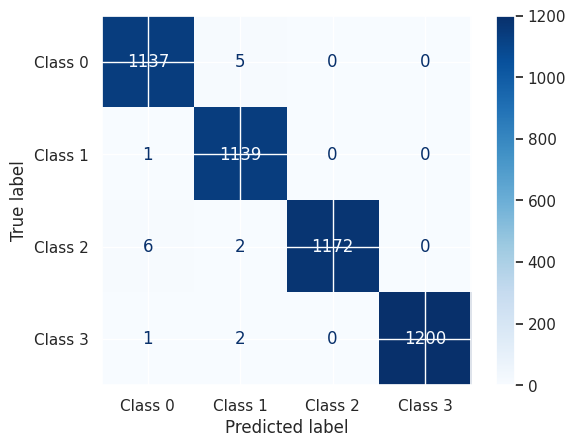

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Assuming you have y_true (true labels) and y_pred (predicted labels)
cm = confusion_matrix(y_test, y_test_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])  # Replace with your class labels

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)  # You can choose a different colormap if desired
plt.show()

In [64]:
import pandas as pd
import xgboost as xgb
# Instead of load_boston, we'll use fetch_california_housing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetch the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Now you can proceed with your train-test split and model training
# ... (rest of your code) ...

In [65]:
import pandas as pd
import xgboost as xgb
# Instead of load_boston, we'll use fetch_california_housing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fetch the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Convert the NumPy array X to a Pandas DataFrame
X = pd.DataFrame(X, columns=housing.feature_names)  # Add this line

# Now you can proceed with your train-test split and model training
# ... (rest of your code) ...

#Vemos que tenemos!
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [66]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [67]:
#Creamos el objeteo XGBoost
regressor = xgb.XGBRegressor(
    n_estimators=80,
    reg_lambda=1, # L1 regularization term on weights
    gamma=0, # Minimum loss reduction required to make a further partition on a leaf node of the tree
    max_depth=3
)

In [68]:
#Fiteamos
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=80, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
#Predecimos
y_pred = regressor.predict(X_test)

In [70]:
#Error
mean_squared_error(y_test, y_pred)

0.0037380156970680785

In [77]:
xgb.XGBRegressor?

Modelos



In [71]:
df_filtered.dtypes

,0
routeID,object
Year,int64
quarter,int64
citymarketid_1,int64
citymarketid_2,int64
city1,object
city2,object
airportid_1,int64
airportid_2,int64
airport_1,object


In [72]:
#Convertimos horsepower en numerico
df_filtered['passengers'] = pd.to_numeric(df_filtered['passengers'], errors='coerce')

In [73]:
#Analisis estadistico de datos
df_filtered.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000,23324.000000
mean,2022.000472,2.506217,31541.201595,32183.117819,12404.444606,13208.374078,1192.896844,356.492711,23539.064912,7064.307366,23482.307066,5179.825630,20024.165881
std,0.815770,1.115853,1104.722775,1255.672229,1415.784621,1422.500413,685.926232,571.782627,8155.971316,2185.792914,8769.196819,3402.037472,7857.845173
min,2021.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,148.000000,0.000000,5800.000000,1429.000000,5800.000000,100.000000,5040.000000
25%,2021.000000,2.000000,30721.000000,30977.000000,11109.000000,12197.000000,647.000000,35.000000,17915.750000,5167.000000,17598.500000,2022.000000,14499.000000
50%,2022.000000,3.000000,31295.000000,32337.000000,12266.000000,13303.000000,1025.000000,144.000000,22301.000000,6970.000000,22121.500000,4681.000000,19206.000000
75%,2023.000000,3.000000,32467.000000,33195.000000,13342.000000,14570.000000,1680.000000,418.000000,27972.250000,9313.250000,28138.250000,8939.500000,24185.500000
max,2023.000000,4.000000,35412.000000,35412.000000,15919.000000,15919.000000,2724.000000,6554.000000,166400.000000,10000.000000,166400.000000,10000.000000,166400.000000


Text(0, 0.5, 'Tarifa')

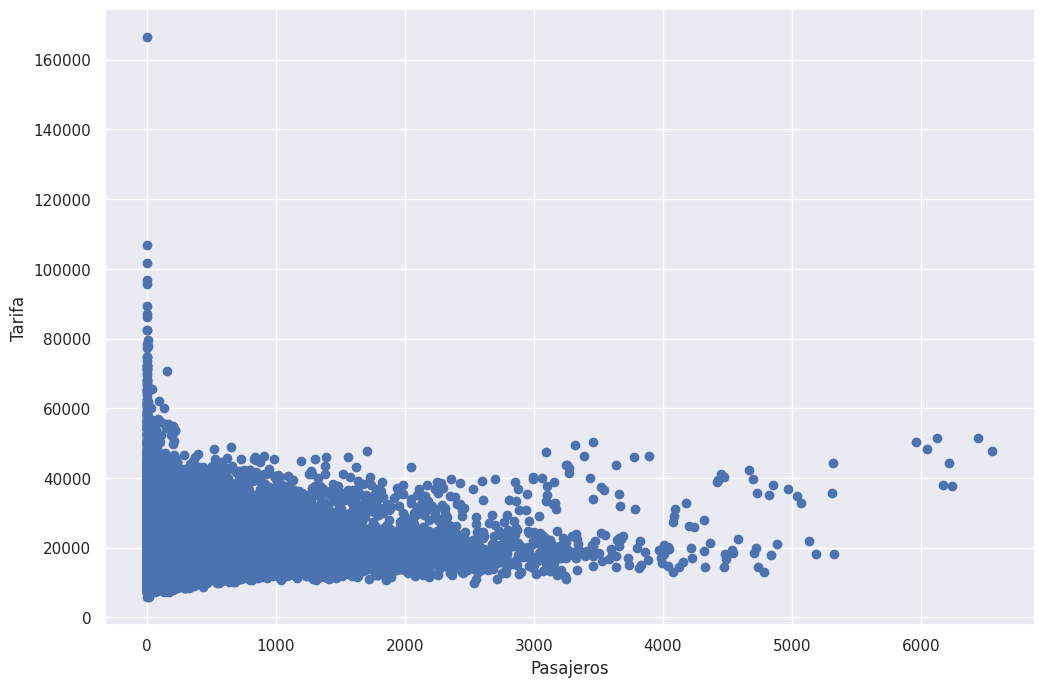

In [74]:
#Veamos algunos plots!
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df_filtered['passengers'], df_filtered['fare'])

plt.xlabel('Pasajeros')
plt.ylabel('Tarifa')

In [75]:
# Assuming 'routeID' is the column with the problematic string
# Convert 'routeID' to numeric, ignoring errors or coercing to NaN as needed
df_filtered['routeID'] = pd.to_numeric(df_filtered['routeID'], errors='coerce')

#Before calculating correlation, select only numeric columns
numeric_df = df_filtered.select_dtypes(include=['number'])

# Analisis de Correlaciones
df_filtered_corr = numeric_df.corr()
df_filtered_corr

,routeID,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
routeID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,-0.012132,-0.000131,-0.006507,0.001166,-0.011265,-0.015690,0.097873,0.218031,-0.004050,0.208799,0.008174,0.144281
quarter,NaN,-0.012132,1.000000,-0.004352,-0.001097,-0.001126,-0.004721,-0.021366,0.062741,0.049223,-0.006763,0.045066,-0.003754,0.025236
citymarketid_1,NaN,-0.000131,-0.004352,1.000000,0.018130,0.539134,0.059367,0.087208,-0.057356,0.037277,-0.104912,0.023528,-0.073059,0.008948
citymarketid_2,NaN,-0.006507,-0.001097,0.018130,1.000000,0.043262,0.563710,0.079673,-0.095837,0.044306,-0.049493,0.038827,-0.001175,0.024755
airportid_1,NaN,0.001166,-0.001126,0.539134,0.043262,1.000000,0.058629,0.076965,-0.036323,0.052001,-0.084655,0.036204,-0.045743,0.051870
airportid_2,NaN,-0.011265,-0.004721,0.059367,0.563710,0.058629,1.000000,0.152454,0.005306,0.088996,-0.110128,0.084655,-0.061128,0.058608
nsmiles,NaN,-0.015690,-0.021366,0.087208,0.079673,0.076965,0.152454,1.000000,-0.046149,0.595062,-0.342222,0.557035,-0.254908,0.426940
passengers,NaN,0.097873,0.062741,-0.057356,-0.095837,-0.036323,0.005306,-0.046149,1.000000,-0.116127,-0.214577,-0.042449,-0.240082,-0.202606
fare,NaN,0.218031,0.049223,0.037277,0.044306,0.052001,0.088996,0.595062,-0.116127,1.000000,-0.256871,0.951921,-0.249933,0.833655


<Axes: >

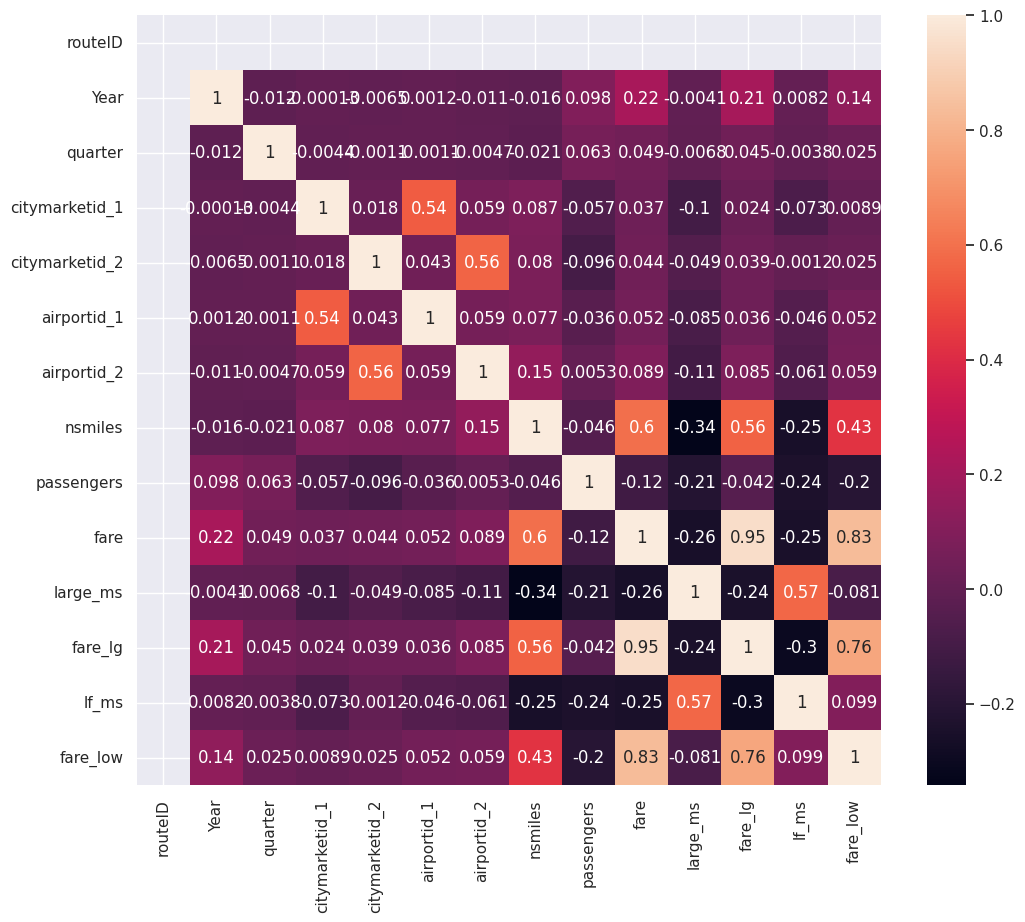

In [76]:
#Matriz de correlacion
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_filtered_corr, annot=True)

In [77]:
#Regresion Lineal
from sklearn.model_selection import train_test_split

X = df_filtered[['passengers']]
Y = df_filtered['fare']

#Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [78]:
from sklearn.linear_model import LinearRegression


linear_model = LinearRegression().fit(x_train, y_train)

In [79]:
print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

Puntaje Entrenamiento:  0.012756918756599345


In [80]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

In [81]:
from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.016279473642129116


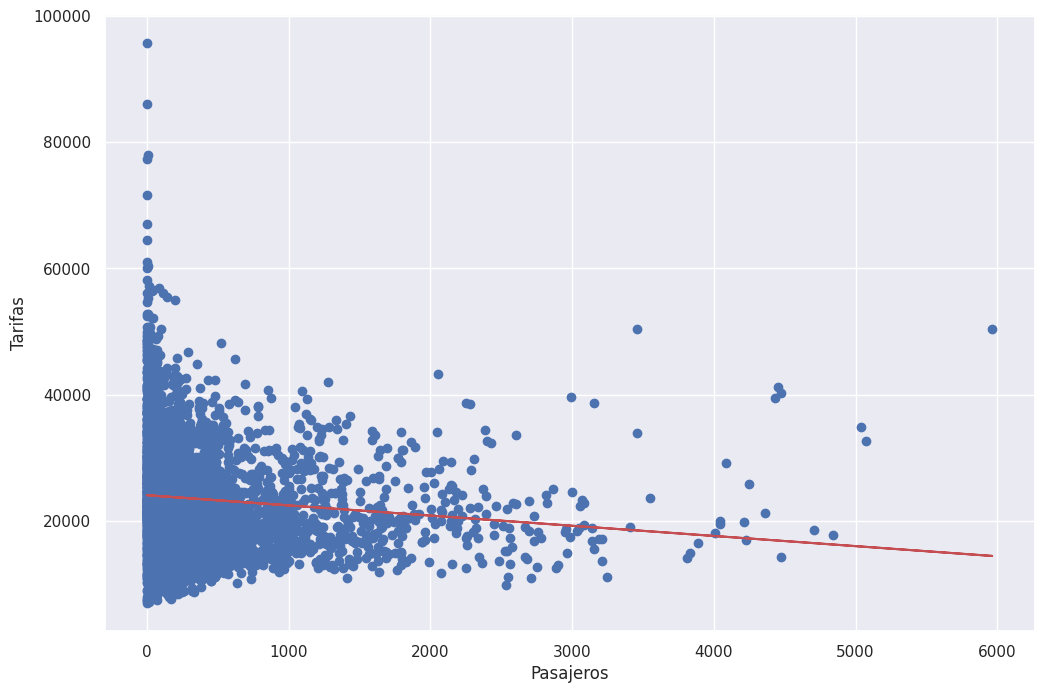

In [82]:
#Ploteamos
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Pasajeros')
plt.ylabel('Tarifas')
plt.show()

In [83]:
#Regresion lineal con varias caracteristicas
X = df_filtered[['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'airportid_1', 'airportid_2']]
Y = df_filtered['passengers']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
#Creamos el modelo


from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

linear_model = LinearRegression().fit(x_train_scaled, y_train)


x_test_scaled = scaler.transform(x_test)
y_pred = linear_model.predict(x_test_scaled)

In [85]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  -26685633.80812969


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [86]:
#Coeficientes
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

citymarketid_2   -80.495904
citymarketid_1   -34.414711
airportid_1       -4.231672
quarter           38.052408
airportid_2       54.622787
Year              54.831386
dtype: float64


In [87]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [88]:
print('Puntaje Testing', r2_score(y_test, y_pred))

Puntaje Testing -22338621.434015084


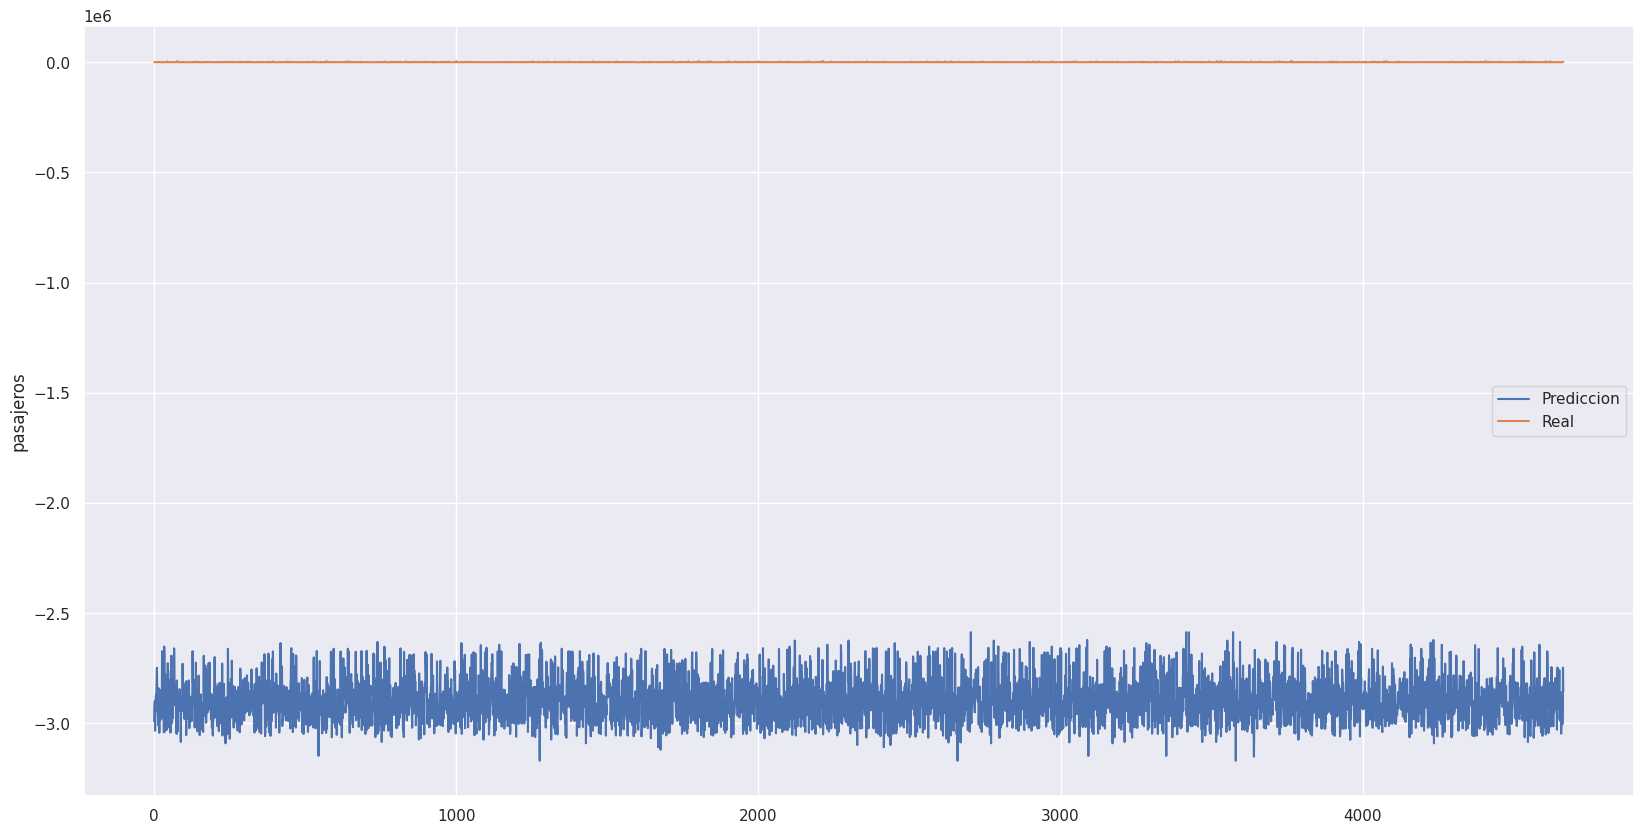

In [90]:
#Ploteamos
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('pasajeros')

plt.legend()
plt.show()

In [91]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2895899.5808919254
Mean Squared Error: 8395290690293.443
Root Mean Squared Error: 2897462.8022277425


Para concluir se puede notar que en la evaluacion de modelo este tipo de modelo no funciona para hacer una prediccion eficiente.